# Roller Coaster

#### Overview

This project is slightly different than others you have encountered thus far. Instead of a step-by-step tutorial, this project contains a series of open-ended requirements which describe the project you'll be building. There are many possible ways to correctly fulfill these requirements, and you should expect to use the internet, Codecademy, and other resources when you encounter a problem that you cannot easily solve.

#### Project Goals

You will work to create several data visualizations that will give you insight into the world of roller coasters.

## Prerequisites

In order to complete this project, you should have completed the first two lessons in the [Data Analysis with Pandas Course](https://www.codecademy.com/learn/data-processing-pandas) and the first two lessons in the [Data Visualization in Python course](https://www.codecademy.com/learn/data-visualization-python). This content is also covered in the [Data Scientist Career Path](https://www.codecademy.com/learn/paths/data-science/).

## Project Requirements

1. Roller coasters are thrilling amusement park rides designed to make you squeal and scream! They take you up high, drop you to the ground quickly, and sometimes even spin you upside down before returning to a stop. Today you will be taking control back from the roller coasters and visualizing data covering international roller coaster rankings and roller coaster statistics.

   Roller coasters are often split into two main categories based on their construction material: **wood** or **steel**. Rankings for the best wood and steel roller coasters from the 2013 to 2018 [Golden Ticket Awards](http://goldenticketawards.com) are provded in `'Golden_Ticket_Award_Winners_Wood.csv'` and `'Golden_Ticket_Award_Winners_Steel.csv'`, respectively. Load each csv into a DataFrame and inspect it to gain familiarity with the data.

In [32]:
# 1 
# Import necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# load rankings data
wood = pd.read_csv("Golden_Ticket_Award_Winners_Wood.csv")
# print(wood.head())
wood.info()

# load rankings data
steel = pd.read_csv("Golden_Ticket_Award_Winners_Steel.csv")
# print(steel.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          180 non-null    int64 
 1   Name          180 non-null    object
 2   Park          180 non-null    object
 3   Location      180 non-null    object
 4   Supplier      179 non-null    object
 5   Year Built    180 non-null    int64 
 6   Points        180 non-null    int64 
 7   Year of Rank  180 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 11.4+ KB
Rank             50
Name             61
Park             54
Location         53
Supplier         32
Year Built       36
Points          148
Year of Rank      6
dtype: int64
El Toro            8
Phoenix            6
Outlaw Run         6
Boulder Dash       6
Ravine Flyer II    6
                  ..
The Legend         1
The Boss           1
Racer              1
Grand National     1
Mine Blower        1
Name: Name, Length: 6

2. Write a function that will plot the ranking of a given roller coaster over time as a line. Your function should take a roller coaster's name and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with `"El Toro"` as the roller coaster name and the wood ranking DataFrame. What issue do you notice? Update your function with an additional argument to alleviate the problem, and retest your function.

coaster_type_subset:
     Rank     Name                       Park       Location Supplier  \
1       2  El Toro  Six Flags Great Adventure  Jackson, N.J.  Intamin   
11      2  El Toro  Six Flags Great Adventure  Jackson, N.J.  Intamin   
21      2  El Toro  Six Flags Great Adventure  Jackson, N.J.  Intamin   
32      3  El Toro  Six Flags Great Adventure  Jackson, N.J.  Intamin   
80      1  El Toro  Six Flags Great Adventure  Jackson, N.J.  Intamin   
131     2  El Toro  Six Flags Great Adventure  Jackson, N.J.  Intamin   

     Year Built  Points  Year of Rank  
1          2006    1302          2013  
11         2006    1291          2014  
21         2006    1464          2015  
32         2006    1121          2016  
80         2009    1241          2017  
131        2006    1197          2018  
El Toro
Jackson, N.J.


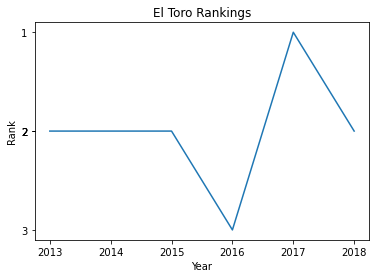

In [61]:
# 2
# Create a function to plot rankings over time for 1 roller coaster
# print(wood.nunique())
# print(wood['Name'].value_counts())
# El Toro appears 8 times
        # wood_subset = wood[(wood['Name']=="El Toro")]
        # print(wood_subset)
        # fig, ax = plt.subplots()
        # ax.plot(wood_subset['Year of Rank'], wood_subset['Rank'])
        # ax.set_xticks(wood_subset['Year of Rank'].values)
        # ax.set_yticks(wood_subset['Rank'].values)
        # ax.invert_yaxis()
        # plt.show()

# Issue: Two of the rankings belong to a coaster in Germany.
# Remove those from the wood_subset dataframe.

# Had problems removing German parks.
# Issue was: 
# The word "Freizeitpark" was misspelled in the dataset as "Freitzeitpark".
        # indexPark = wood_subset[(wood_subset['Park']=='Freitzeitpark Plohn')].index
        # wood_subset.drop(indexPark, inplace=True)
        # print(wood_subset)

# To avoid future problems with identically named coasters in different locations,
# include "Location" in the function call.
def coaster_rankings_plot(coaster_name, coaster_location, coaster_type):
    coaster_type_subset = coaster_type[(coaster_type['Name']==coaster_name) & \
        (coaster_type['Location']==coaster_location)]
    print("coaster_type_subset:")
    print(coaster_type_subset)
    print(coaster_name)
    print(coaster_location)
        # print(coaster_type) 
    # Google does not know how to print dataframe "name" only.
    # coaster_type.name -> 'DataFrame' object has no attribute 'name'.
    # Instead of just the name, need to print entire dataframe.
    fig, ax = plt.subplots()
    ax.plot(coaster_type_subset['Year of Rank'], coaster_type_subset['Rank'])
    ax.set_xticks(coaster_type_subset['Year of Rank'].values)
    ax.set_yticks(coaster_type_subset['Rank'].values)
    ax.invert_yaxis()
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.title('{} Rankings'.format(coaster_name))
    plt.show()
# Call function
coaster_rankings_plot("El Toro", "Jackson, N.J.", wood)

3. Write a function that will plot the ranking of two given roller coasters over time as lines. Your function should take both roller coasters' names and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with `"El Toro"` as one roller coaster name, `"Boulder Dash"` as the other roller coaster name, and the wood ranking DataFrame. What issue do you notice? Update your function with two additional arguments to alleviate the problem, and retest your function.

     Rank          Name            Park        Location         Supplier  \
0       1  Boulder Dash  Lake Compounce  Bristol, Conn.              CCI   
10      1  Boulder Dash  Lake Compounce  Bristol, Conn.              CCI   
20      1  Boulder Dash  Lake Compounce  Bristol, Conn.              CCI   
30      1  Boulder Dash  Lake Compounce  Bristol, Conn.  Custom Coasters   
82      3  Boulder Dash  Lake Compounce  Bristol, Conn.  Custom Coasters   
133     4  Boulder Dash  Lake Compounce  Bristol, Conn.  Custom Coasters   

     Year Built  Points  Year of Rank  
0          2000    1333          2013  
10         2000    1480          2014  
20         2000    1625          2015  
30         2000    1216          2016  
82         2000    1171          2017  
133        2000     982          2018  


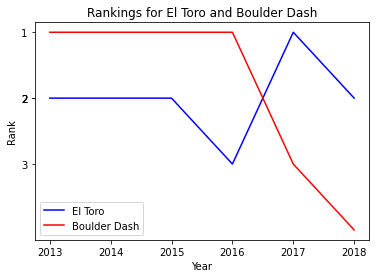

In [79]:
# 3
# Create a function to plot rankings over time for 2 roller coasters
wood_subset = wood[(wood['Name']=="Boulder Dash")]
print(wood_subset)
# Boulder Dash appears 6 times. Location is "Bristol, Conn."

def coaster_rankings_plot_2(coaster_name_1, coaster_location_1, coaster_name_2, coaster_location_2, coaster_type):
    
    coaster_type_subset_c1 = coaster_type[(coaster_type['Name']==coaster_name_1) & \
        (coaster_type['Location']==coaster_location_1)]
    coaster_type_subset_c2 = coaster_type[(coaster_type['Name']==coaster_name_2) & \
        (coaster_type['Location']==coaster_location_2)]
    
    # print("coaster_type_subset_c1:")
    # print(coaster_type_subset_c1)
    # print(coaster_name_1)
    # print(coaster_location_1)
        # print(coaster_type) 
    # Google does not know how to print dataframe "name" only.
    # coaster_type.name -> 'DataFrame' object has no attribute 'name'.
    # Instead of just the name, need to print entire dataframe.
    fig, ax = plt.subplots()
    ax.plot(coaster_type_subset_c1['Year of Rank'], coaster_type_subset_c1['Rank'], color="blue", label=coaster_name_1)
    ax.plot(coaster_type_subset_c2['Year of Rank'], coaster_type_subset_c2['Rank'], color="red", label=coaster_name_2)
    ax.set_xticks(coaster_type_subset_c1['Year of Rank'].values)
    ax.set_yticks(coaster_type_subset_c1['Rank'].values)
    ax.invert_yaxis()
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.title('Rankings for {} and {}'.format(coaster_name_1, coaster_name_2))
    plt.legend()
    plt.show()
    plt.close()
# Call function
coaster_rankings_plot_2("El Toro", "Jackson, N.J.", "Boulder Dash", "Bristol, Conn.", wood)

4. Write a function that will plot the ranking of the top `n` ranked roller coasters over time as lines. Your function should take a number `n` and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

   For example, if `n == 5`, your function should plot a line for each roller coaster that has a rank of `5` or lower.
   
   Call your function with a value of `n` and either the wood ranking or steel ranking DataFrame.

     Rank             Name                       Park             Location  \
0       1     Boulder Dash             Lake Compounce       Bristol, Conn.   
1       2          El Toro  Six Flags Great Adventure        Jackson, N.J.   
2       3          Phoenix  Knoebels Amusement Resort        Elysburg, Pa.   
3       4       The Voyage              Holiday World    Santa Claus, Ind.   
4       5      Thunderhead                  Dollywood  Pigeon Forge, Tenn.   
10      1     Boulder Dash             Lake Compounce       Bristol, Conn.   
11      2          El Toro  Six Flags Great Adventure        Jackson, N.J.   
12      3       The Voyage              Holiday World    Santa Claus, Ind.   
13      4          Phoenix  Knoebels Amusement Resort        Elysburg, Pa.   
14      5      Thunderhead                  Dollywood  Pigeon Forge, Tenn.   
20      1     Boulder Dash             Lake Compounce       Bristol, Conn.   
21      2          El Toro  Six Flags Great Adventure        Jac

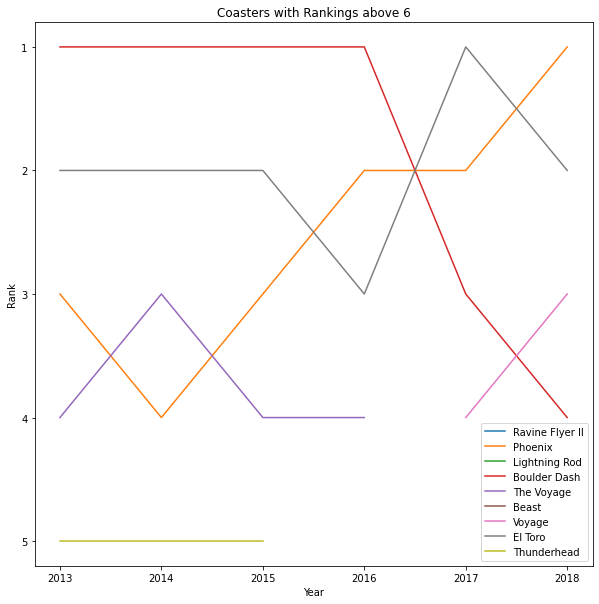

In [86]:
# 4
# Create a function to plot top n rankings over time
def plot_top_n(coaster_type, n):
  top_n_rankings = coaster_type[coaster_type['Rank'] <= n]
  print(top_n_rankings) 
  top_n_rankings.info()
# In the wood dataframe:
  # There are 30 rows with Rank<=5.
  # There are 24 rows with Rank<=4.
  # There are 18 rows with Rank<=3.
  # There are 12 rows with Rank<=2.
  # There are 6 rows with Rank<=1.
# TOP N DOES NOT MEAN THERE ARE N COASTERS. 
# N REFERS TO THE VALUE OF THE RANK.


  fig, ax = plt.subplots(figsize=(10,10))

  # Converting "Name" column to a set so it can be iterated.
  for i in set(top_n_rankings['Name']):
    coaster_type_subset_i = top_n_rankings[top_n_rankings['Name'] == i]
    ax.plot(coaster_type_subset_i['Year of Rank'], coaster_type_subset_i['Rank'], label=i)
  
  ax.set_yticks([y_val for y_val in range(1,6)])
  ax.invert_yaxis()
  
  # plt.title("Top {} Rankings", format(n))
# THE TAG ABOVE CAUSED A PROBLEM: 
# ValueError: dictionary update sequence element #0 has length 1; 2 is required
# Rewriting it 
  plt.title("Coasters with Rankings above {}".format(n+1))



  plt.xlabel('Year')
  plt.ylabel('Rank')
  plt.legend(loc=4)
  plt.show()
  plt.close()

# Call function
plot_top_n(wood, 5)

5. Now that you've visualized rankings over time, let's dive into the actual statistics of roller coasters themselves. [Captain Coaster](https://captaincoaster.com/en/) is a popular site for recording roller coaster information. Data on all roller coasters documented on Captain Coaster has been accessed through its API and stored in `roller_coasters.csv`. Load the data from the csv into a DataFrame and inspect it to gain familiarity with the data.

In [88]:
# 5
# load roller coaster data
roller_coasters = pd.read_csv('roller_coasters.csv')
print(roller_coasters.head())

            name material_type seating_type  speed  height  length  \
0       Goudurix         Steel     Sit Down   75.0    37.0   950.0   
1  Dream catcher         Steel    Suspended   45.0    25.0   600.0   
2     Alucinakis         Steel     Sit Down   30.0     8.0   250.0   
3       Anaconda        Wooden     Sit Down   85.0    35.0  1200.0   
4         Azteka         Steel     Sit Down   55.0    17.0   500.0   

   num_inversions     manufacturer            park            status  
0             7.0           Vekoma    Parc Asterix  status.operating  
1             0.0           Vekoma   Bobbejaanland  status.operating  
2             0.0         Zamperla    Terra Mítica  status.operating  
3             0.0  William J. Cobb  Walygator Parc  status.operating  
4             0.0           Soquet          Le Pal  status.operating  


6. Write a function that plots a histogram of any numeric column of the roller coaster DataFrame. Your function should take a DataFrame and a column name for which a histogram should be constructed as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame and one of the column names.

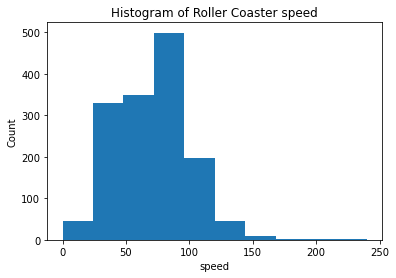

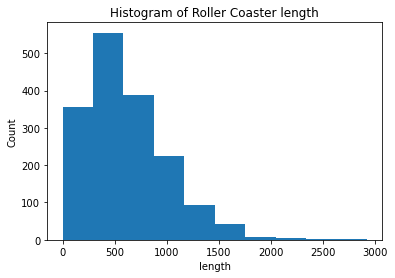

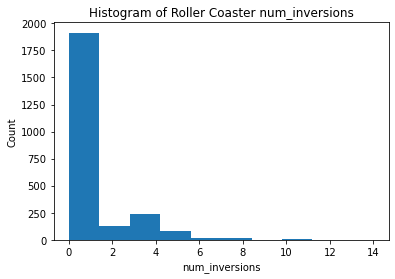

             speed       height       length  num_inversions
count  1478.000000  1667.000000  1675.000000     2405.000000
mean     70.102842    26.725855   606.147463        0.809563
std      28.338394    35.010166   393.840496        1.652254
min       0.000000     0.000000    -1.000000        0.000000
25%      47.000000    13.000000   335.000000        0.000000
50%      72.000000    23.000000   500.000000        0.000000
75%      88.000000    35.000000   839.000000        1.000000
max     240.000000   902.000000  2920.000000       14.000000


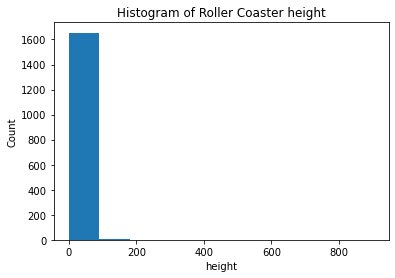

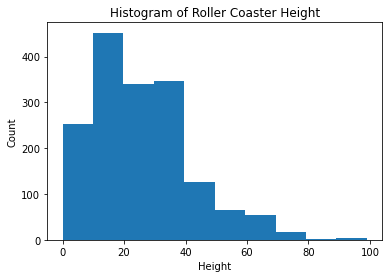

<Figure size 432x288 with 0 Axes>

In [95]:
# 6
# Create a function to plot histogram of column values
def plot_histogram(coaster_df, column_name):
  plt.hist(coaster_df[column_name].dropna())
  plt.title('Histogram of Roller Coaster {}'.format(column_name))
  plt.xlabel(column_name)
  plt.ylabel('Count')
  plt.show()
  plt.close()

# Create histogram of roller coaster speed
plot_histogram(roller_coasters, 'speed')
plt.clf()
plt.close()

# Create histogram of roller coaster length
plot_histogram(roller_coasters, 'length')
plt.clf()
plt.close()

# Create histogram of roller coaster number of inversions
plot_histogram(roller_coasters, 'num_inversions')
plt.clf()
plt.close()

# Find max height
print(roller_coasters.describe())
# max height is 902. Could be an outlier.
plot_histogram(roller_coasters, 'height')
plt.clf()
plt.close()
# Most values are under 200.

# Create a function to plot histogram of height values
def plot_height_histogram(coaster_df):
  heights = coaster_df[coaster_df['height'] <= 100]['height'].dropna()
  plt.hist(heights)
  plt.title('Histogram of Roller Coaster Height')
  plt.xlabel('Height')
  plt.ylabel('Count')
  plt.show()
  plt.close()

# Create a histogram of roller coaster height
plot_height_histogram(roller_coasters)
plt.clf()

7. Write a function that creates a bar chart showing the number of inversions for each roller coaster at an amusement park. Your function should take the roller coaster DataFrame and an amusement park name as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame and amusement park name.

<ipython-input-109-8aa59cbd5144>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


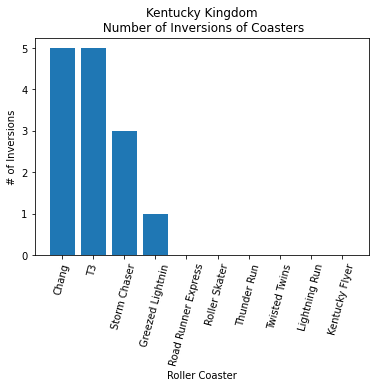

<Figure size 432x288 with 0 Axes>

In [109]:
# 7
# Create a function to plot inversions by coaster at park
def plot_inversions(coaster_data, park):
    # Extract all columns for requested park
    coasters_in_park = coaster_data[coaster_data['park'] == park]
    coasters_in_park = coasters_in_park.sort_values('num_inversions', ascending=False)
    coaster_names = coasters_in_park['name']
    number_inversions = coasters_in_park['num_inversions']

    plt.bar(range(len(number_inversions)), number_inversions)
    ax = plt.subplot()
    ax.set_xticks(range(len(coaster_names)))
    ax.set_xticklabels(coaster_names, rotation=75)
    plt.title('{}\n Number of Inversions of Coasters'.format(park))
    plt.xlabel('Roller Coaster')
    plt.ylabel('# of Inversions')
    plt.show()
    plt.close()
# Create barplot of inversions by roller coasters
plot_inversions(roller_coasters, 'Kentucky Kingdom')
plt.clf()

8. Write a function that creates a pie chart that compares the number of operating roller coasters (`'status.operating'`) to the number of closed roller coasters (`'status.closed.definitely'`). Your function should take the roller coaster DataFrame as an argument. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame.

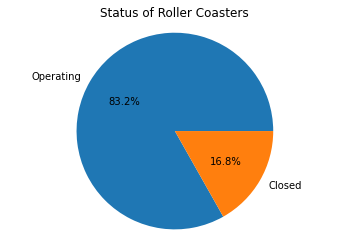

<Figure size 432x288 with 0 Axes>

In [114]:
# 8
# Create a function to plot a pie chart of status.operating
def pie_chart_status(coaster_data):
    operating = coaster_data[coaster_data['status'] == 'status.operating']
    closed = coaster_data[coaster_data['status'] == 'status.closed.definitely']
    num_operating = len(operating)
    num_closed = len(closed)
    pie_data = [num_operating, num_closed]

    plt.pie(pie_data, autopct='%0.1f%%', labels=['Operating', 'Closed'])
    plt.title('Status of Roller Coasters')
    plt.axis('equal')
    plt.show()
    plt.close()

# Create pie chart of roller coasters
pie_chart_status(roller_coasters)
plt.clf()

9. `.scatter()` is another useful function in matplotlib that you might not have seen before. `.scatter()` produces a scatter plot, which is similar to `.plot()` in that it plots points on a figure. `.scatter()`, however, does not connect the points with a line. This allows you to analyze the relationship between two variables. Find [`.scatter()`'s documentation here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

   Write a function that creates a scatter plot of two numeric columns of the roller coaster DataFrame. Your function should take the roller coaster DataFrame and two-column names as arguments. Make sure to include informative labels that describe your visualization.
   
   Call your function with the roller coaster DataFrame and two-column names.

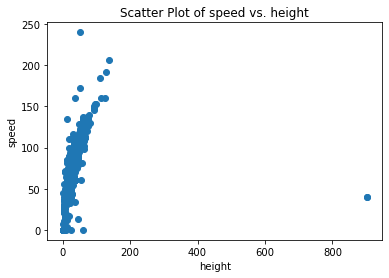

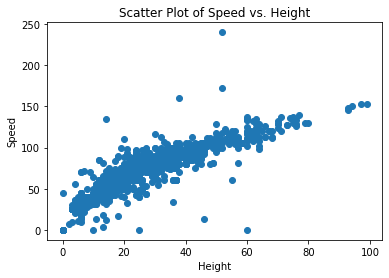

In [117]:
# 9
# Create a function to plot scatter of any two columns
def plot_scatter(coaster_data, column_x, column_y):
  plt.scatter(coaster_data[column_x], coaster_data[column_y])
  plt.title('Scatter Plot of {} vs. {}'.format(column_y, column_x))
  plt.xlabel(column_x)
  plt.ylabel(column_y)
  plt.show()
  plt.close()
# Create a function to plot scatter of speed vs height
def plot_scatter_height_speed(coaster_data):
  coaster_data = coaster_data[coaster_data['height'] < 100]
  plt.scatter(coaster_data['height'], coaster_data['speed'])
  plt.title('Scatter Plot of Speed vs. Height')
  plt.xlabel('Height')
  plt.ylabel('Speed')
  plt.show()
  plt.close()
# Create a scatter plot of roller coaster height by speed
plot_scatter(roller_coasters, 'height', 'speed')
plot_scatter_height_speed(roller_coasters)

10. Part of the fun of data analysis and visualization is digging into the data you have and answering questions that come to your mind.

    Some questions you might want to answer with the datasets provided include:
    - What roller coaster seating type is most popular? And do different seating types result in higher/faster/longer roller coasters?
    - Do roller coaster manufactures have any specialties (do they focus on speed, height, seating type, or inversions)?
    - Do amusement parks have any specialties?
    
    What visualizations can you create that answer these questions, and any others that come to you? Share the questions you ask and the accompanying visualizations you create on the Codecademy forums.

## Solution

Great work! Visit [our forums](https://discuss.codecademy.com/t/roller-coaster-challenge-project-python-pandas/462378) or the file **Roller Coaster_Solution.ipynb** to compare your project to our sample solution code. You can also learn how to host your own solution on GitHub so you can share it with other learners! Your solution might look different from ours, and that's okay! There are multiple ways to solve these projects, and you'll learn more by seeing others' code.